# Домашнее задание «Визуализация данных»

Обязательная часть
Вам необходимо провести базовый EDA выбранного набора данных.

Требования к анализу:

построить не менее 4 визуализаций различных видов;
каждая визуализация должным образом оформлена и читается даже в отрыве от контекста;
по каждой визуализации необходимо написать вывод (какую гипотезу на ее основе можно выдвинуть?).

In [3]:
import matplotlib.pyplot as plt #Документация: https://matplotlib.org/contents.html
import pandas as pd
import numpy as np
import re

In [360]:
#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 11,7

In [241]:
df = pd.read_csv('/Users/sergejgordeev/Desktop/ОБУЧЕНИЕ/2. Phyton/15. Визуализация данных/googleplaystore.csv')

In [242]:
df['Reviews'] = df['Reviews'].replace(r'...', np.NaN)
df['Reviews'] = df['Reviews'].str.replace(r'(\d)(.)(\d*)([M])', r'\1\3/00000')
df['Reviews'] = df['Reviews'].str.replace(r'/', '')
df['Reviews'] = df['Reviews'].astype('float64')

df['Size'] = df['Size'].str.replace(r'(\d)(.)(\d)([M])', r'\1\3/00') 
df['Size'] = df['Size'].str.replace(r'/', '')
df['Size'] = df['Size'].replace('Varies with device', np.NaN)
df['Size'] = df['Size'].str.replace(r'M', '000')
df['Size'] = df['Size'].str.replace(r'(\d)(.)(\d)([k])', r'\1\3')
df['Size'] = df['Size'].str.replace(r'k', '')
df['Size'] = df['Size'].str.replace(',000[+]', '')
df['Size'] = df['Size'].str.replace('1[+]', '0,001')
df['Size'] = df['Size'].astype('float64')
df['Size'] = df['Size'] * 1000

df['Installs'] = df['Installs'].replace('Free', np.NaN)
df['Installs'] = df['Installs'].str.replace(r'[+]', '')
df['Installs'] = df['Installs'].str.replace(r',', '')
df['Installs'] = df['Installs'].astype('Float64')

df['Price'] = df['Price'].str.replace(r'^[$]', '')
df['Price'] = df['Price'].replace(r'Everyone', np.NaN)
df['Price'] = df['Price'].astype('Float64')

df['Last Updated'] = df['Last Updated'].replace(r'...', np.NaN)
df['Last Updated'] = df['Last Updated'].replace('1.0.19', np.NaN)
df['Last Updated'] = df['Last Updated'].astype('datetime64[ns]')

In [261]:
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [243]:
df.head(100)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000000.0,10000.0,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000000.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8700000.0,5000000.0,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25000000.0,50000000.0,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2800000.0,100000.0,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,All of the parking lot - National Park applica...,AUTO_AND_VEHICLES,4.0,1754.0,14000000.0,500000.0,Free,0.0,Everyone,Auto & Vehicles,2018-06-02,2.3.4,4.0 and up
96,Inquiry Fines and Debits of Vehicles,AUTO_AND_VEHICLES,4.4,2680.0,2200000.0,500000.0,Free,0.0,Everyone,Auto & Vehicles,2018-03-20,1.03,4.0.3 and up
97,Gas Station,AUTO_AND_VEHICLES,4.0,1288.0,4500000.0,100000.0,Free,0.0,Everyone,Auto & Vehicles,2018-04-21,2.17,4.0 and up
98,Hush - Beauty for Everyone,BEAUTY,4.7,18900.0,17000000.0,500000.0,Free,0.0,Everyone,Beauty,2018-08-02,6.10.1,5.0 and up


Требования к анализу:

построить не менее 4 визуализаций различных видов;
каждая визуализация должным образом оформлена и читается даже в отрыве от контекста;
по каждой визуализации необходимо написать вывод (какую гипотезу на ее основе можно выдвинуть?).

In [320]:
#df.info()

## Столбчатая диаграмма

In [313]:
Category_inst = df[['Category', 'App']].groupby('Category').count().sort_values(by = "App", ascending=False).head(10)
Category_inst
# Выведено топ 10 категорий в порядке убывания

,App
Category,
FAMILY,1972
GAME,1144
TOOLS,843
MEDICAL,463
BUSINESS,460
PRODUCTIVITY,424
PERSONALIZATION,392
COMMUNICATION,387
SPORTS,384


<AxesSubplot:title={'center':'Топ 5 категорий по количеству приложений'}, xlabel='Категория приложения', ylabel='Количество приложений'>

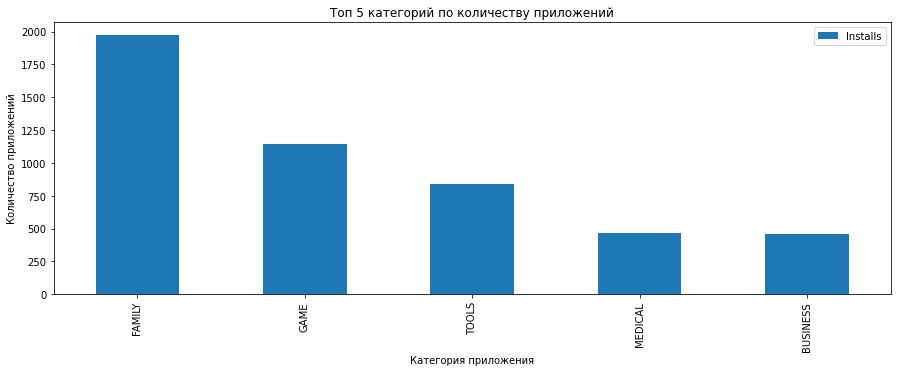

In [341]:
games_by_platforms.loc[['FAMILY', 'GAME', 'TOOLS', 'MEDICAL', 'BUSINESS']].plot(kind='bar', 
                                                                  title='Топ 5 категорий по количеству приложений',
                                                                  xlabel='Категория приложения',
                                                                  ylabel='Количество приложений')

Существенную долю занимают семейные приложение с отрывом почти вдвое от игр.

## Гистограмма

<AxesSubplot:title={'center':'Распределение оценок пользователей (рейтинг)'}, ylabel='Frequency'>

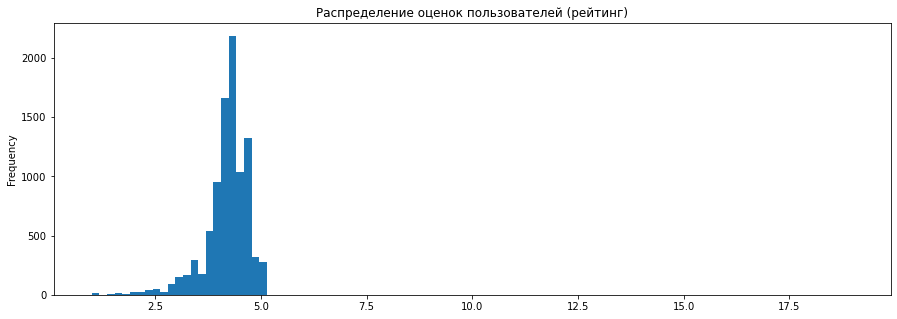

In [342]:
df['Rating'].plot(kind='hist', 
                   title='Распределение оценок пользователей (рейтинг)', bins=100)

Основная доля оценок находится от 3 до 4.5

Круговая диаграмма

<AxesSubplot:title={'center':'Количество приложений'}, ylabel='Category'>

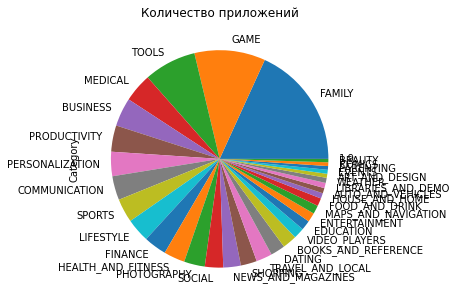

In [343]:
import matplotlib.pyplot as plt
pie_data = df['Category'].value_counts()
pie_data.plot(kind='pie', title='Количество приложений')

Существенную долю занимают семейные приложение с отрывом почти вдвое от игр. Визуально доля составляет около 30%.

### Boxplot

<AxesSubplot:title={'center':'Распределение рейтинго приложений'}>

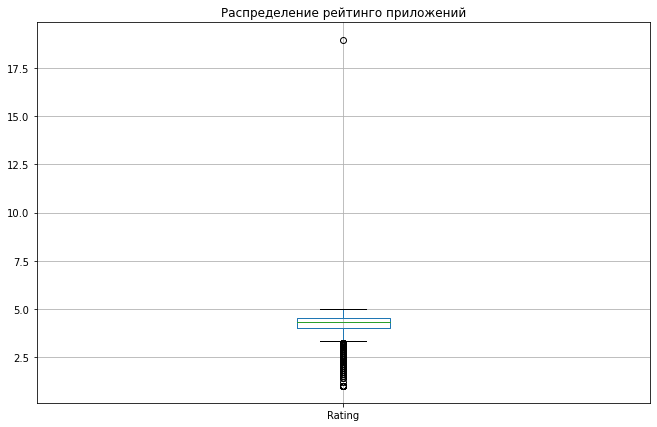

In [361]:
df['Rating'].plot(kind='box',
                   title='Распределение рейтинго приложений', grid=True)

Условно к псевдовыбросам относятся оценки ниже 3. График не является показательным с используемыми данным. Пользователи не склонны ставит плохие оценки.

Text(0.5, 1.0, 'Корреляция между загрузками и оценками пользователей')

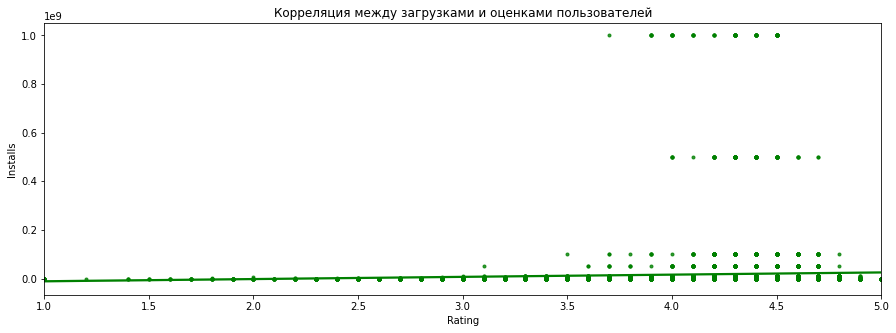

In [344]:
import seaborn as sns
# посмотрим зависимость продаж и оценок критиков
sns.regplot(data=df, x='Rating', y='Installs', color='green', marker='.')
plt.title('Корреляция между загрузками и оценками пользователей')




Text(0.5, 1.0, 'Распределение оценок')

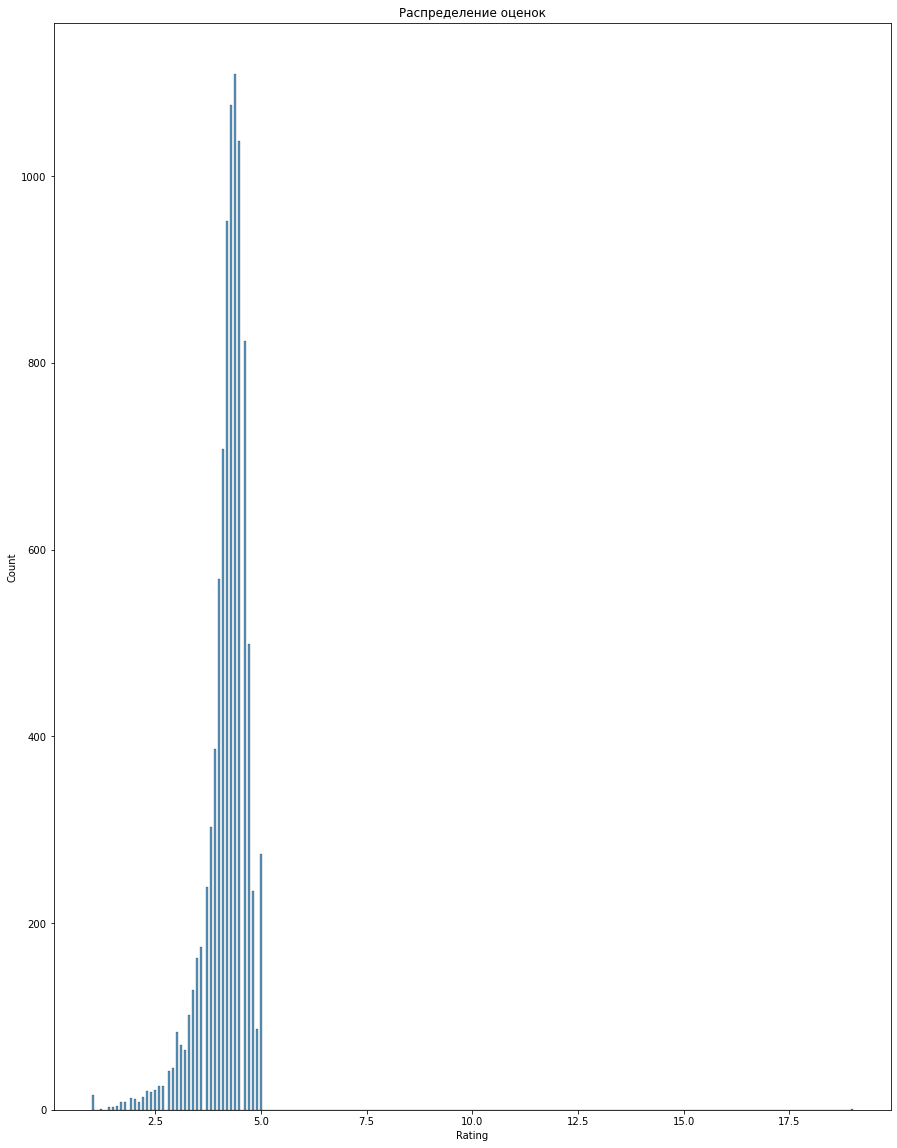

In [355]:
sns.histplot(df['Rating'])
plt.title('Распределение оценок')


Основная доля оценок находится от 3 до 4.5


## Подскажите пожалуйста как изменять размер графиков по осям Х и Y. А также каким образом смещать легенду и менять ее в размерах?